# Food Product Analysis sold in Germany 

### "Aim to enhance food product quality, optimize supply chain efficiency, and ensure regulatory compliance through comprehensive data analysis for food products sold in germany." 

#### Open Food Facts is a collaborative and open database that provides information about food products from around the world. It is a project that aims to collect and share data on food products, including details such as ingredients, nutritional information, labels, and packaging. Open Collaboration: The database is maintained by a community of contributors who can add, edit, and enhance product information. This collaborative approach helps in building a comprehensive and up-to-date repository of food data.

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'Open_food_Product_Data.csv'
chunk_size = 10 ** 6 

reader = pd.read_csv(file_path, sep='\t', chunksize=chunk_size, iterator=True)

result_df = pd.DataFrame()

for chunk in reader:

    # Concatenate the chunk to the result DataFrame
    result_df = pd.concat([result_df, chunk], ignore_index=True)

result_df.head()


C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\2558169487.py:8: DtypeWarning: Columns (0,11,17,31,32,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\2558169487.py:8: DtypeWarning: Columns (0,11,17,33,34,35,52,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\2558169487.py:8: DtypeWarning: Columns (0,11,17,33,35,67,72,150) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\2558169487.py:8: DtypeWarning: Columns (0,11,17,23,24,25,26,27,31,32,33,35,36,37,44,46,47,48,51,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.692102e+09,2023-08-15T12:12:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.705641e+09,2024-01-19T05:11:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.682646e+09,2023-04-28T01:40:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.705640e+09,2024-01-19T04:59:34Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.707490e+09,2024-02-09T14:47:36Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
result_df.shape

(3082013, 206)

In [ ]:
#columns_to_remove = ['code','url','creator','created_t','created_datetime','last_modified_t','last_modified_datetime','last_modified_by','last_updated_t','last_updated_datetime','abbreviated_product_name','quantity','packaging','packaging_tags','brands_tags','categories','categories_tags','origins','origins_tags','origins_en','manufacturing_places_tags','labels','labels_tags','emb_codes','emb_codes_tags','first_packaging_code_geo','cities','cities_tags','countries','countries_tags','ingredients_tags','ingredients_analysis_tags','allergens_en','traces','traces_tags','serving_size','serving_quantity','product_quantity','owner','data_quality_errors_tags','unique_scans_n','popularity_tags','completeness','last_image_t','last_image_datetime','image_url','image_small_url','image_ingredients_url','image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url']

# Use the drop method to remove columns
#filtered_df = filtered_df.drop(columns=columns_to_remove)

# Data Cleaning 

In [4]:
## Filter only rows which has Germany|Deutschland as value 
pd.set_option('display.max_columns', None)
condition = result_df['countries_en'].str.contains('Germany|Deutschland', case=False, na=False)

# Apply the filter to the DataFrame
filtered_df = result_df[condition]

# Display the filtered DataFrame
filtered_df.shape 


(245057, 206)

In [6]:
filtered_df['ingredients_tags'] = filtered_df['ingredients_tags'].astype('str')
filtered_df['ingredients_text'] = filtered_df['ingredients_text'].astype('str')

C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\1453880842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ingredients_tags'] = filtered_df['ingredients_tags'].astype('str')
C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\1453880842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ingredients_text'] = filtered_df['ingredients_text'].astype('str')


In [7]:
import pandas as pd
import re

# Function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

# Apply the cleaning function to the 'ingredients_tags' column
filtered_df['ingredients_tags_cleaned'] = filtered_df['ingredients_tags'].apply(clean_text)

# Display the cleaned DataFrame
print(filtered_df[['ingredients_tags', 'ingredients_tags_cleaned']])


C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\3618349477.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ingredients_tags_cleaned'] = filtered_df['ingredients_tags'].apply(clean_text)


                                          ingredients_tags  \
1                                                      nan   
26                                                     nan   
81                                                     nan   
412                                                    nan   
421                      fr:lait-de-chevre-ferment-produit   
...                                                    ...   
3081998  en:cream,en:dairy,en:strawberry,en:fruit,en:be...   
3082000                                                nan   
3082006                                                nan   
3082009                                                nan   
3082010                                                nan   

                                  ingredients_tags_cleaned  
1                                                      nan  
26                                                     nan  
81                                                     nan  
412        

In [9]:
import pandas as pd

# Assuming filtered_df is your DataFrame

# Define a function to clean the text
def clean_text(text):
    # Define characters to remove
    unnecessary_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ';', ':', '"', "'", '<', '>', ',', '.', '/', '?']
    
    # Remove unnecessary characters
    cleaned_text = ''.join([char for char in text if char not in unnecessary_chars])
    
    return cleaned_text

# Apply the cleaning function to the column
filtered_df['ingredients_tags_cleaned'] = filtered_df['ingredients_tags_cleaned'].apply(clean_text)


C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_24220\3280827601.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ingredients_tags_cleaned'] = filtered_df['ingredients_tags_cleaned'].apply(clean_text)


In [13]:
### Cleaning the data for macro neutrient , Protein , Carbs and Fats 
filtered_df = filtered_df[~(filtered_df['carbohydrates_100g'] > 100)].sort_values(by = 'carbohydrates_100g',ascending=False)
filtered_df = filtered_df[~(filtered_df['fat_100g'] > 100)].sort_values(by = 'carbohydrates_100g',ascending=False)
filtered_df = filtered_df[~(filtered_df['proteins_100g'] > 100)].sort_values(by = 'carbohydrates_100g',ascending=False)

In [56]:
filtered_df['ingredients_text_cleaned'] = filtered_df['ingredients_text']

In [24]:
language_codes_to_remove = ['aa', 'ab', 'ae', 'af', 'ak', 'am', 'an', 'ar', 'as', 'av', 'ay', 'az',
                            'ba', 'be', 'bg', 'bh', 'bi', 'bm', 'bn', 'bo', 'br', 'bs', 'ca', 'ce',
                            'ch', 'co', 'cr', 'cs', 'cu', 'cv', 'cy', 'da', 'de', 'dv', 'dz', 'ee',
                            'el', 'en', 'eo', 'es', 'et', 'eu', 'fa', 'ff', 'fi', 'fj', 'fo', 'fr',
                            'ga', 'gl', 'gn', 'gu', 'gv', 'ha', 'he', 'hi', 'ho', 'hr', 'ht', 'hu',
                            'hy', 'hz', 'ia', 'id', 'ie', 'ig', 'ii', 'ik', 'io', 'is', 'it', 'iu',
                            'ja', 'jv', 'ka', 'kg', 'ki', 'kj', 'kk', 'kl', 'km', 'kn', 'ko', 'kr',
                            'ks', 'ku', 'kv', 'kw', 'ky', 'la', 'lb', 'lg', 'li', 'ln', 'lo', 'lt',
                            'lu', 'lv', 'mg', 'mh', 'mi', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt', 'nb',
                            'nd', 'ne', 'ng', 'nl', 'nn', 'no', 'nr', 'nv', 'ny', 'oc', 'oj', 'om',
                            'or', 'os', 'pa', 'pi', 'pl', 'ps', 'pt', 'qu', 'rm', 'rn', 'ro', 'ru',
                            'rw', 'sa', 'sc', 'sd', 'se', 'sg', 'si', 'sk', 'sl', 'sm', 'sn', 'so',
                            'sq', 'sr', 'ss', 'st', 'su', 'sv', 'sw', 'ta', 'te', 'tg', 'th', 'ti',
                            'tk', 'tl', 'tn', 'to', 'tr', 'ts', 'tt', 'tw', 'ty', 'ug', 'uk', 'ur',
                            'uz', 've', 'vi', 'vo', 'wa', 'wo', 'xh', 'yi', 'yo', 'za', 'zh', 'zu']

In [25]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['ingredients_tags_cleaned'] = filtered_df['ingredients_tags_cleaned'].str.replace(f'{code}:', '')

In [49]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['additives_tags_cleaned'] = filtered_df['additives_tags_cleaned'].str.replace(f'{code}:', '')

In [61]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['labels_tags'] = filtered_df['labels_tags'].str.replace(f'{code}:', '')

In [67]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['allergens'] = filtered_df['allergens'].str.replace(f'{code}:', '')

In [73]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['packaging_en'] = filtered_df['packaging_en'].str.replace(f'{code}:', '')

# Deceptive labelling 

In [57]:
# Remove language codes from 'ingredients_tags' column
for code in language_codes_to_remove:
    filtered_df['labels_tags'] = filtered_df['labels_tags'].str.replace(f'{code}:', '')

In [58]:
most_common_label = filtered_df['labels_tags'].value_counts().head(10)
most_common_label

vegetarian,vegan                                                              4105
organic,eu-organic,eg-öko-verordnung                                          2607
green-dot                                                                     2486
no-gluten                                                                     2029
no-gmos,ohne-gentechnik                                                       1913
made-in-germany                                                               1733
vegetarian,vegan,european-vegetarian-union,european-vegetarian-union-vegan    1550
nutriscore                                                                    1500
nutriscore,nutriscore-grade-a                                                 1194
organic                                                                       1124
Name: labels_tags, dtype: int64

In [60]:
filtered_df['labels_tags'].isnull().sum()

166340

In [ ]:
filtered_df['labels_tags'].isnull().sum()

In [70]:
### Exporting the file to csv
filtered_df.to_csv('Food_data_cleaned.csv', index=False)

In [62]:
most_common_label = filtered_df['labels_tags'].value_counts().head(10)

print("Most Common Label Tag:", most_common_label)


condition = filtered_df['labels_tags'].str.contains('en:no-preservatives', case=False, na=False)

# Apply the filter to the DataFrame
no_preservatives_claim  = filtered_df[condition]

# Display the filtered DataFrame
no_preservatives_claim.shape

Most Common Label Tag: vegetarian,vegan                                                              4105
organic,eu-organic,eg-öko-verordnung                                          2607
green-dot                                                                     2486
no-gluten                                                                     2029
no-gmos,ohne-gentechnik                                                       1913
made-in-germany                                                               1733
vegetarian,vegan,european-vegetarian-union,european-vegetarian-union-vegan    1550
nutriscore                                                                    1500
nutriscore,nutriscore-grade-a                                                 1194
organic                                                                       1124
Name: labels_tags, dtype: int64


(0, 208)

244875

In [6]:
import pandas as pd

# Assuming result_df is your DataFrame
unique_countries = result_df['countries_en'].unique()

# Printing all unique countries
for country in unique_countries:
    print(country)


France
Germany
Spain
United States
Ireland
nan
Belgium
United Kingdom
France,United States
Switzerland,United States
Côte d'Ivoire
Canada
Germany,World
Ukraine
France,Germany
Switzerland
Italy
Belgium,France
Peru
Thailand
Oman
Slovenia
France,Germany,Netherlands
Kuwait
Belgium,Germany
United Arab Emirates
France,Switzerland
India
Romania
Australia
Germany,Spain
Malaysia
Luxembourg
Austria
United Kingdom,United States
Portugal
Russia
Mexico
Dominican Republic
Pakistan
Réunion
Hungary
Martinique
Poland
Germany,United States
Slovakia
Germany,United Kingdom
Moldova
Israel
Argentina
Netherlands
Denmark
Norway
Puerto Rico
Germany,Ireland
Saudi Arabia
Bulgaria
Jamaica
Czech Republic
Senegal
Turkey
Algeria
Rwanda
France,United Kingdom
Belgium,France,Netherlands,United Kingdom
Guadeloupe
Qatar
Denmark,France,Norway,Poland,Spain,Sweden,United Kingdom
Chile
Bangladesh
Italy,Slovenia
El Salvador
Guernsey
Greece
South Africa
Germany,Frankreich
Spain,Switzerland
France,Russia
Sweden
Finland
Germany,

Finland,France,Spain
Austria,Bulgaria,Finland,France,Germany,Sweden,Switzerland
Belgium,Denmark,France,Germany,Portugal,Spain
Austria,Finland,France,Germany,Switzerland
Austria,Bulgaria,France,Germany,Switzerland,United Kingdom
Austria,Bulgaria,France,Germany
Denmark,France,Germany,Spain,Switzerland
Belgium,France,Germany,Spain,Switzerland,United States
Bulgaria,Czech Republic,Germany,Netherlands,Spain,United States
France,Germany,Hungary,Spain,Switzerland
Czech Republic,Germany,Romania
Czech Republic,France,Germany,Poland,Slovakia,Spain,Switzerland
Germany,Ireland,United Kingdom
France,Germany,Italy,Slovenia
Finland,France,Germany,Ireland,United States
France,Lithuania,Netherlands
Bulgaria,Germany,Spain
Deutschland,Frankreich
Belgium,Czech Republic,France,Germany,Morocco,Portugal,Spain
France,Germany,Poland,Romania,Spain
Austria,Belgium,Bulgaria,Denmark,France,Germany,Italy,Netherlands,Poland,Portugal,Spain
Bulgaria,France,Germany,Hungary,Poland,Romania,Slovenia,Spain
France,Germany,I

Bulgaria,France,Hungary,Spain
Bulgaria,Czech Republic,Italy
Georgia,Greece
Germany,Vietnam
Croatia,Finland
European Union,Slovenia
Croatia,France,Slovenia
Bosnia and Herzegovina,Croatia,Montenegro,Serbia,Slovenia
Austria,Bosnia and Herzegovina,Croatia,Montenegro,Republika Srpska,Slovenia
Austria,Bosnia and Herzegovina,Croatia,France,Montenegro,Republika Srpska,Slovenia
Algeria,European Union
Serbia,Slovenia
Croatia,Serbia,Slovenia
France,Slovenia,En
France,Italy,Senegal
Bosnia and Herzegovina,North Macedonia,Slovenia
Bosnia and Herzegovina,Croatia,Italy,Slovenia
Bosnia and Herzegovina,France
Bosnia and Herzegovina,Montenegro,Serbia
Kosovo,Slovenia
Bosnia and Herzegovina,Croatia,Slovenia
Croatia,North Macedonia
Croatia,France,Italy
Bosnia and Herzegovina,Croatia,Serbia,Slovenia
Croatia,Luxembourg
Bosnia and Herzegovina,Croatia,Republika Srpska,Slovenia
Bosnia and Herzegovina,Bulgaria,Croatia,Republika Srpska,Slovenia
Bosnia and Herzegovina,Croatia,France,North Macedonia,Serbia
Slovakia,

Belgium,France,Luxembourg,Morocco,Netherlands,Switzerland
Belgium,Czech Republic,Germany
Australia,Czech Republic,Finland,France,Spain,United Kingdom
Armenia,Ireland,United Kingdom
Australia,Czech Republic,France,Germany,Slovakia,Spain,Switzerland
Belgium,Portugal
Finland,Luxembourg
France,Germany,Italy,Norway,Spain,Sweden,United Kingdom
Belgium,France,French Guiana,Germany,Réunion
Belgium,Denmark,France,Germany,Italy,Netherlands,New Zealand,Spain,Sweden,United Kingdom
Åland Islands,France
Belgium,Denmark,France,Germany,United Kingdom
Belgium,Spain,Francia
Belgium,China,France,Germany
Belgium,France,Germany,Ireland,Spain,Switzerland
Lebanon,Switzerland
Belgium,France,Italy,Netherlands,Spain,United Kingdom
Spain,Belgica,Francia
France,Germany,Italy,Netherlands,Switzerland
France,Netherlands,Spain,Switzerland
Russia,Deutschland
Finland,France,United Kingdom
Belgium,Finland,Germany,Spain,Switzerland
Ireland,Luxembourg
Belgium,Czech Republic,Estonia,Finland,Netherlands,Norway,Poland,Slovak

Argentina,Bolivia,Brazil
Brazil,Chile,France
Bolivia,Brazil,France
Bolivia,Brazil,Paraguay,United States
Belgium,Bolivia,Brazil,France
Bolivia,Brazil,Costa Rica,El Salvador,Guatemala,Madagascar,Mozambique,Paraguay,Suriname,Uruguay
Bolivia,Brazil,Costa Rica,Paraguay,Uruguay
Bolivia,Brazil,Cape Verde,Costa Rica,Honduras,Madagascar,Mayotte,Mozambique,Paraguay,Suriname
Bolivia,Brazil,Costa Rica,El Salvador,Guatemala,Mozambique,Paraguay,Uruguay
Bolivia,Brazil,Costa Rica,Madagascar,Mozambique,Paraguay,Suriname,Uruguay
Brazil,Chile
Argentina,Bolivia,Brazil,Chile,Paraguay,Peru,Uruguay
Belgium,Bolivia,Brazil,Paraguay,United States
Bolivia,Brazil,Paraguay,Spain,United States
Belgium,Bolivia,Brazil
Bolivia,Brazil,Chile,Paraguay,Uruguay
Bolivia,Brazil,Chile,Paraguay,Spain,Uruguay
Brazil,Paraguay,Uruguay,Venezuela
Argentina,Bolivia,Brazil,Chile,Costa Rica,Paraguay,Peru,Uruguay
Bolivia,Curaçao,Dominican Republic,Haiti,Panama,Paraguay
Bolivia,Curaçao,Dominican Republic,Haiti,Nicaragua,Panama,Paraguay

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
860,0000084154071,http://world-en.openfoodfacts.org/product/0000...,javichu,1351359717,2012-10-27T17:41:57Z,1644517169,2022-02-10T18:19:29Z,packbot,1.707490e+09,2024-02-09T14:48:46Z,Salsa de mostaza,NaN,Salsa de mostaza,300 g (neto),Bote de plástico,es:bote-de-plastico,es:bote-de-plastico,NaN,"Prima,//Propiedad de://,Bolton Cile España S.A...","prima,propiedad-de,bolton-cile-espana-s-a,pert...","Condimentos, Salsas, Salsas de mostaza, en:gro...","en:condiments,en:sauces,en:mustards,en:groceries","Condiments,Sauces,Mustards,Groceries",NaN,NaN,NaN,"Las Ventas de Retamosa,Toledo (provincia),Cast...","las-ventas-de-retamosa,toledo-provincia,castil.

In [81]:
filtered_df.head()

,product_name,generic_name,packaging_en,packaging_text,brands,categories_en,manufacturing_places,labels_en,purchase_places,stores,countries_en,ingredients_text,allergens,traces_en,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,main_category,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
860,Salsa de mostaza,Salsa de mostaza,es:bote-de-plastico,NaN,"Prima,//Propiedad de://,Bolton Cile España S.A...","Condiments,Sauces,Mustards,Groceries","Las Ventas de Retamosa,Toledo (provincia),Cast...","Vegetarian,Vegan","Madrid,España",OpenCor,Spain,"Agua, vinagre, _mostaza_, azúcares, sal, espec...",en:mustard,NaN,NaN,0.0,NaN,NaN,NaN,NaN,unknown,3.0,Fat and sauces,Dressings and sauces,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces","Fats and sauces,Dressings and sauces","en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,59.0,c,en:fat-in-moderate-quantity,en:groceries,Groceries,320.0,NaN,320.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,Mehrkomponeneten Protein 90 C6 Haselnuß,Mehrkomponeneten Protein in Haselnuß Geschmack,Bucket,NaN,allfitnessfactory.de,"Dietary supplements,Bodybuilding supplements,P...",Germany,NaN,Germany,allfitnessfact

In [ ]:
generic_name

# Product Categorization:
### Q1 : How many products belong to each category?

In [100]:
import pandas as pd

# Assuming filtered_df is your DataFrame
unique_main_categories = filtered_df['pnns_groups_2'].value_counts().head(20)

# Displaying the top 10 most sold main categories
print(unique_main_categories)

unknown                     6983
Cereals                     3221
Biscuits and cakes          1705
Sweets                      1685
One-dish meals              1514
Cheese                      1433
Milk and yogurt             1381
Bread                       1119
Processed meat               995
Alcoholic beverages          925
Dressings and sauces         924
Vegetables                   904
Chocolate products           656
Fish and seafood             638
Salty and fatty products     584
Sweetened beverages          584
Dairy desserts               544
Meat                         511
Fats                         420
Appetizers                   408
Name: pnns_groups_2, dtype: int64


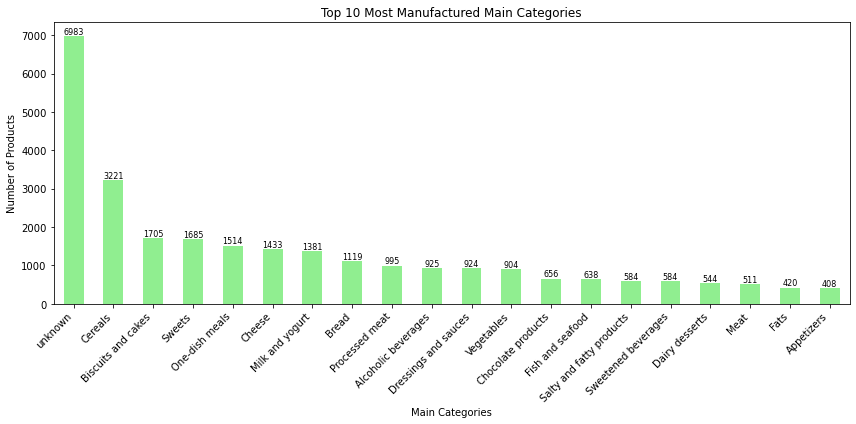

In [101]:
plt.figure(figsize=(12, 6))
ax = unique_main_categories.plot(kind='bar', color='lightgreen')

# Displaying the actual count on top of each bar
for i, v in enumerate(unique_main_categories):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.title('Top 10 Most Manufactured Main Categories')
plt.xlabel('Main Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()

In [59]:
groceries = filtered_df[filtered_df['main_category']=='groceries']
grcery_prodycts = groceries['product_name'].value_counts()

# Displaying the top 10 most sold main categories
print(grcery_prodycts)

Mayonnaise               6
Tomaten Ketchup          6
Basilikum                5
Guacamole                5
Pesto rosso              4
                        ..
Salz Marken-Jodsalz      1
Salz +Jod + Fluorid      1
Grobes Meersalz          1
Knoblauch Salz           1
Sauce Pour Nems Ayam™    1
Name: product_name, Length: 790, dtype: int64


In [58]:
groceries['product_name']

860                  Salsa de mostaza
4797                    Ingwer Wurzel
22058           Tabasco Salsa picante
28624    Mostaza de Dijon Great Value
42095                 Red Curry Paste
Name: product_name, dtype: object

# Macro Neutrients : Carbs, Fat , Protein

In [64]:
most_common_label = filtered_df['labels_tags'].value_counts().head(10)

print("Most Common Label Tag:", most_common_label)


condition = filtered_df['labels_tags'].str.contains('en:no-preservatives', case=False, na=False)

# Apply the filter to the DataFrame
no_preservatives_claim  = filtered_df[condition]

# Display the filtered DataFrame
no_preservatives_claim.shape

Most Common Label Tag: vegetarian,vegan                                                              4105
organic,eu-organic,eg-öko-verordnung                                          2607
green-dot                                                                     2486
no-gluten                                                                     2029
no-gmos,ohne-gentechnik                                                       1913
made-in-germany                                                               1733
vegetarian,vegan,european-vegetarian-union,european-vegetarian-union-vegan    1550
nutriscore                                                                    1500
nutriscore,nutriscore-grade-a                                                 1194
organic                                                                       1124
Name: labels_tags, dtype: int64


(0, 208)

In [6]:
result_df_DE = result_df[(result_df['countries']=='en:de') | (result_df['countries']=='en:Germany')]

In [12]:
result_df_DE

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.705641e+09,2024-01-19T05:11:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,0000038010702100024400,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1616065900,2021-03-18T11:11:40Z,1682764778,2023-04-29T10:39:38Z,roboto-app,1.682765e+09,2023-04-29T10:39:38Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,000092568,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1613500603,2021-02-16T18:36:43Z,1613500616,2021-02-16T18:36:56Z,kiliweb,1.705629e+09,2024-01-19T01:42:10Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2120,0001,http://world-en.openfoodfacts.org/product/0001...,date-limite-app,1531760498,2018-07-16T17:01:38Z,1691344929,2023-08-06T18:02:09Z,prepperapp,1.707491e+09,2024-02-09T15:07:25Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,000123490,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1617123411,2021-03-30T16:56:51Z,1666729249,2022-10-25T20:20:49Z,roboto-app,1.666729e+09,2022-10-25T20:20:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076180,9941004071041,http://world-en.openfoodfacts.org/product/9941...,kiliweb,1654424532,2022-06-05T10:22:12Z,1654425166,2022-06-05T10:32:46Z,roboto-app,1.705640e+09,2024-01-19T05:00:25Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076202,9943340111989271000796,http://world-en.openfoodfacts.org/product/9943...,kiliweb,1613239834,2021-02-13T18:10:34Z,1613239837,2021-02-13T18:10:37Z,kiliweb,1.705628e+09,2024-01-19T01:40:53Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076204,99436940,http://world-en.openfoodfacts.org/product/9943...,kiliweb,1663527750,2022-09-18T19:02:30Z,1663527753,2022-09-18T19:02:33Z,kiliweb,1.705643e+09,2024-01-19T05:48:45Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076293,9950606264014331001892,http://world-en.openfoodfacts.org/product/9950...,kiliweb,1645648041,2022-02-23T20:27:21Z,1664900957,2022-10-04T16:29:17Z,roboto-app,1.705638e+09,2024-01-19T04:13:21Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
filtered_df.to_csv('C:/Users/Krishna Narwade/urban Tech/_food_manufactured_in_de.csv', index=False)

In [38]:
filtered_df['manufacturing_places'].unique()

array(['Las Ventas de Retamosa,Toledo (provincia),Castilla-La Mancha,España',
       'Germany', 'germany', ..., 'Biberach, Deutschland',
       'Deutschland,Biberach', 'Meppen,Deutschland'], dtype=object)

In [41]:
filtered_df['manufacturing_places'].unique()

array(['Las Ventas de Retamosa,Toledo (provincia),Castilla-La Mancha,España',
       'Germany', 'germany', ..., 'Biberach, Deutschland',
       'Deutschland,Biberach', 'Meppen,Deutschland'], dtype=object)

In [42]:
import pandas as pd

# Assuming result_df is your DataFrame
unique_countries = filtered_df['manufacturing_places'].unique()

# Printing all unique countries
for country in unique_countries:
    print(country)


Las Ventas de Retamosa,Toledo (provincia),Castilla-La Mancha,España
Germany
germany
Hyderabad
Royaume-Uni,Irelande
Miguel Hidalgo, Ciudad de México
San Nicolas de los Garza, Nuevo León
Estado de México
Eden Prairie,Minnesota,USA
Denmark
Estados Unidos de America
Deutschland
Schweden
MEXICO,Estados Unidos de America
Ciudad de México
made in uk
Denver
Estados Unidos de América
Estado Unidos de América
île de Mull,Écosse,Royaume-Uni
Thaïlande,Thailand
Thaïlande
Thailande
Thailand,Thaïlande
ciudad de México
Écosse,Royaume-Uni,Grande-Bretagne
Madeleines BIJOU,Les Lacs 87500 St-Yrieix la Perche France
made in USA
Importé de Grèce
Cuajimalpa de Morelos,Cdmx
San Miguel de Allende
hollande
Hofheim-Wallau,Deutschland
Hillside,New Jersey,Estados Unidos
Fabricado en Estados Unidos de America
Émirats arabes unis,PRODUCED BY: GULF FOOD INDUSTRIES- CALIFORNIA GARDEN,P.O. BOX 17100,DUBAI - U.A.E. www.gficg.com OF
boulder Colorado
Estado de México,México
Estado de Mexico
Estado de,Mexico
Ibiza,España,S

Treuenbrietzen OT Bardenitz
Deutschland,Bocholt
Paderborn,Deutschland
[ENVASADOR],Villanueva de Castellón,Valencia (provincia),Comunidad Valenciana,España
Villanueva de Castellón,Valencia (provincia),Comunidad Valenciana,España
rehda- Wiedenbrück
Lindenberg,Allgäu
Soest,Germany
Dissen, Deutschland
Düsseldorf,Düsseldorf (distrito),Renania del Norte-Westfalia,Alemania
Karlsruhe,Deutschland
Ottersberg,Deutschland
Radolfzell am Bodensee,Konstanz (Landkreis),Freiburg (Regierungsbezirk),Baden-Württemberg,Deutschland
Jüterbog,Teltow-Fläming (Landkreis),Brandenburg,Deutschland
Deutschland,Jüterbog
Reitmehring,Deutschland
Kammlach,Deutschland
8111 NV HEETEN,Niederlande
Halle,Deutschland
Golßen, Brandenburg, Deutschland
Deutschland,Saarlouis
D33780,Halle,Germany
D-21107,Hamburg,Deutschland
Hameln,Hameln-Pyrmont (Landkreis),Niedersachsen,Deutschland
Wildeshausen,Deutschland
Dettingen/Teck
A-2500,Baden
Oderwitz,Sachsen,Deutschland
Schneverdingen,Deutschland
Osnabrück, Deutschland
D-21640, Nettensd

Conserverie des Tuilières Arnaud - Les Tuilières - 87700 Aixe-sur-Vienne,Haute-Vienne,Limousin,France
France,Île de la Réunion
Artigues-près-Bordeaux,France
Pont de Ruan,France,touraine
Val de Loire,Touraine,France
Pont de Ruan (37)
37260 Pont de Ruan
FR-37260 PONT DE RUAN 2 chemin de la Prée Les Pâtissiers de France
Kerisnel,29250,St Pol de Léon,France
Marie Morin France - ZA de l'Espérance,22120 Quessoy,Côtes-d'Armor,Bretagne,France
Marie Morin France - ZA de l'Espérance,22120 Quessoy,Côtes-d'Armor,Bretagne,44350 Guérande,Loire-Atlantique,Pays de la Loire,France
Marie Morin Z.A de l'Espérance  22120 QUESSOY -FRANCE
MARIE MORIN  2 rue du Tisonnier Zone Artisanale de l'Espérance 22120 Quessoy,Cotes d'Armor,Bretagne,France
vedene 84
Lodeve 34700
Apremont,Savoie,France,Fruitière des vignerons des terroirs de Savoie
GAEC de St Pierre,26340,Vercheny,Drôme,France
landeda 29870
Castelnaudary,Aude
Bain de Bretagne
Saint Germain Laprade
france,Nadouce,Lavardens,Gers
Lavardens,Gers,france,Nadou

Meschede-Grevenstein
Freising, Bayern, Germany
Nestlé Deutschland AG   41415 Neuss
41415 Neuss,Deutschland
Freiburg,  Deutschland
Freiburg,Germany
Freiburg im Breisgau,Friburgo (región),Baden-Wurtemberg,Alemania
58706 Menden,Deutschland
Amecke GmbH, 58706 Menden, Deutschland
Menden/Sauerland, Deutschland
58706 Menden, Deutschland
58706 Menden,Germany
58706 Menden,Deutschland,Germany
29581 Bohlsen,Deutschland
Dinkelsbühl,Deutschland
Hamburg,Germany
Bad Adelholzen
83313 Bad Adelholzen
Adelholzen
83313 Bad Adenholzen
Deutschland, Bayern
DE-83313 Siegsdorf
Deutschland,Neunkirchen
Legau,Deutschland
87764,Legau,Deutschland
Legau,Germany
RAPUNZEL Naturkost 87764legau Deutshland
Neu-Anspach,Deutschland
61267 Neu-Anspach, Deutschland
Versmold,Deutschland
33775 Versmold,Deutschland
20503 Hamburg, Deutschland
DE TH-EV 3026 EG
Bernburg, Deutschland
Calw,Black Forest,Baden-Würrtemberg,Deutschland
Gutshof-Ei GmbH,Hauptstr. 1,D-23795,Schackendorf,Germany
Schackendorf,Deutschland
Neuruppin, Deutschlan

Bönen, Deutschland
Schönwalde Glien
Ostbevern,Deuschland
Deutschland, Herford
Reichental,Germany
Allfrucht Vertriebs GmbH,Postfach 110402,40504 Düsseldorf,Deutschland,.
Dudeldorf
neuss,deutschland
Gierstädt,Deutschland
Zaandam, Niederlande
Lindenberg,Německo
coolback GmbH,14947 Nuthe-Urstromtal,Germany
84307 Eggenfelden,Beacker Bachmeier GmbH & Co. KG
HANSA-HEEMANN AG,25462 Rellingen,Deutschland
Hückelhoven,Deutschland
Bergisch Gladbach, Deutschland
Lehnin,Deutschland
Deutschland,Bruchsal
Bruchsal, Deutschland
Sachsenmilch Leppersdorf GmbH,An der Breiten,01454 Leppersdorf,Deutschland
Traunstein,Deutschland
Arnoldi Quelle Germete,Deutschland
Wiesenfeld,Meeder
JG Kapelle,Niederlande
Mönchengladbach,Nordrhein-Westfalen,Deutschland
Leppersdorf,Deutschland
Rottenburg an der Laaber, Bayern, Deutschland
Timmendorfer Strand,Deutschland
Österreich und Deutschland
Diedersdorf
Breiberg,Deutschland
Brauerei Mönchengladbach, Senefelderstraße 29, D-41066 Mönchengladbach
Spanien,Niederlande
Fildersta

Italien, Rummo S.p.A - Via dei Grandi Maestri Pastai 1 - 82100 - Benevento (BN) Italia
Rummo S.p.A - Via dei Grandi Maestri Pastai 1 - 82100 - Benevento (BN) Italia,Italien
Oleificio Salvadori S.r.l., Via delle Nazioni Unite 26/28 - 50018 - Scandicci (FI), Italia
OLEIFICIO SALVADORI SRL - Via delle Nazioni Unite 26/28 Scandicci (FI) Italia, Oleificio Salvadori S.r.l., Via delle Nazioni Unite 26/28 - 50018 - Scandicci (FI), Italia
Oleificio Salvadori S.r.l.,Via delle Nazioni Unite 26/28 - 50018 - Scandicci (FI),Italia
Firenze, Oleificio Salvadori S.r.l., Via delle Nazioni Unite 26/28 - 50018 - Scandicci (FI), Italia
Via del lavoro 45/47, 20863 - Concorezzo (MB) Italia
Dolciaria Gadeschi S.p.A., Strada Provinciale 26 Km5 - 26010 - Corte de'Frati (CR) Italia
Dolciaria Gadeschi S.p.A.,Strada Provinciale 26 Km5 - 26010 - Corte de'Frati (CR) Italia
Quality Food Group S.p.a., Crich S.p.a., Via Alcide de Gasperi 11 - 31050 - Zenson di Piave (TV), Italia
Zenson di Piave (TV), Quality Food Group

In [43]:
import pandas as pd

# Assuming result_df is your DataFrame
unique_countries = filtered_df['manufacturing_places_tags'].unique()

# Printing all unique countries
for country in unique_countries:
    print(country)


las-ventas-de-retamosa,toledo-provincia,castilla-la-mancha,espana
germany
hyderabad
royaume-uni,irelande
miguel-hidalgo,ciudad-de-mexico
san-nicolas-de-los-garza,nuevo-leon
estado-de-mexico
eden-prairie,minnesota,usa
denmark
estados-unidos-de-america
deutschland
schweden
mexico,estados-unidos-de-america
ciudad-de-mexico
made-in-uk
denver
estado-unidos-de-america
ile-de-mull,ecosse,royaume-uni
thailande,thailand
thailande
thailand,thailande
ecosse,royaume-uni,grande-bretagne
madeleines-bijou,les-lacs-87500-st-yrieix-la-perche-france
made-in-usa
importe-de-grece
cuajimalpa-de-morelos,cdmx
san-miguel-de-allende
hollande
hofheim-wallau,deutschland
hillside,new-jersey,estados-unidos
fabricado-en-estados-unidos-de-america
emirats-arabes-unis,produced-by-gulf-food-industries-california-garden,p-o-box-17100,dubai-u-a-e-www-gficg-com-of
boulder-colorado
estado-de-mexico,mexico
estado-de,mexico
ibiza,espana,santa-eulalia-del-rio
s-a-desopry
delavan,wi,usa
made-with-pride-and-care-heb,san-antonio

refresco-france-2885-route-des-pangons-26260-marges,drome,rhone-alpes,france
societe-charcutiere-de-l-odet-sco-filiale-itm-entreprises-groupement-les-mousquetaires-za-de-troyalac-h-route-de-rosporden-29170-saint-evarzec,finistere,bretagne,france
delvert,malemort-sur-correze,france
confit-de-provence-5135-route-d-avignon-la-petite-calade-13540-puyricard,bouches-du-rhone,provence-alpes-cote-d-azur,france
intersnack-france-isf-filiale-groupe-intersnack-route-de-compiegne-02290-montigny-lengrain,aisne,picardie,france
france,alpes-de-haute-provence,annot
france,filet-bleu-1-rue-nicolas-sadi-carnot-za-de-troyalach-29170-saint-evarzec
even-lait-industrie-zi-de-train-bihan-29260-ploudaniel-france,29260-ploudaniel,fabrique-par-even-lait-industrie-zi-de-traon-bihan-29260-ploudaniel-france
fromagerie-de-livarot-fdl-42-rue-du-general-leclerc-14140-livarot,calvados,basse-normandie,france
societe-laitiere-de-l-hermitage,place-de-la-gare,35590,l-hermitage,france
scps-66-avenue-des-champs-elysees,750

snv-za-des-fourmi-la-chapelle-d-andaine-61140-rives-d-andaine
maison-briau-bp-104,47931-agen-cedex
brasserie-des-sources,2-avenue-du-college,59230,st-amand-les-eaux,france
st-amand-les-eaux,france,59230,brasserie-des-sources
made-in-eu
made-in-europe
saint-aignan-de-grand-lieu
alsace,france,6-rue-de-l-ecluse,wittisheim
earl-domaine-de-la-hautiere,2-rue-de-l-epinay,44690,saint-fiacre-sur-maine,france
za-17200-st-sulpice-de-royan
la-fournee-doree-lfd-za-sud-des-achards,85150-la-mothe-achard,vendee,pays-de-la-loire,france
85150,vendee,france,pays-de-la-loire,la-mothe-achard
la-fournee-doree,85150,vendee,pays-de-la-loire,france,mothe-achard
poligono-industrial-el-mugron-c-aparadoras,1-esquina-avd-de-madrid-apartado-de-correos-213-02640-almansa-albacete-espana
france,nord-de-la-france,nord
37600-verneuil-s-indre,laiterie-de-verneuil
france,loire-atlantique,saint-julien-de-concelles
02310,charly-sur-marne,aisne,hauts-de-france,france
9-rue-de-la-chapelle-62370-nortkerque
ferme-de-prouzic
soc

dusseldorf,germany,af-deutschland-gmbh
via-molinetto-76,31030-borso-del-grappa,tv,italia
46395-bocholt,deutschland
40472-dusseldorf,deutschland
novandie,19-rue-de-la-republique,cs-41089,fr-76153-maromme-cedex
06917-jessen-elster,deutschland
deutschland,cham
de-89312,gunzburg,niemcy
22130-crehen,laiterie-nouvelle-de-l-arguenon-bellevue-fr-22130-crehen
laiterie-nouvelle-de-l-arguenon-lna-filiale-laita-groupe-even-za-bellevue-22130-crehen,cotes-d-armor,bretagne,france,22130-crehen,laiterie-nouvelle-de-l-arguenon-bellevue-fr-22130-crehen
bayerische-milchindustrie,e-on-allee-1,84036-landshut,deutschland
zanetti-spa,via-pedemontana-36,43124,parma,italie
avenida-de-la-fama
muhlenstrasse-5,d-06721-osterfeld-ot-roda,deutschland
apensen,deutschland
deutschland,apensen
skanderborg
gronvang-food-aps,gronvangsalle-2,6600-vejen,denmark
heilbronn,deutschland,niederlande
neckarsulm,germany
product-of-germany
adendorf,deutschland
valle-fiorita-via-delle-comunicazioni-24-72017-ostuni-br-italia
via-campo

medellin,bogota-rio-negro,antioquia
valle-del-cauca,colombia
bugalagrande,valle-del-cauca,colombia
nestle-de-colombia-s-a
colombia,medellin
medellin-colombia
medellin,funza-cundinamarca
yumbo,valle-del-cauca,colombia
cartagena-de-indias,colombia
avenida-troncal-de-occidente-n-20-85-bodega-32-mosquera
deutsches
medellin-bogota
penaflor,santiago-de-chile
resguardo-indigena-de-calderas-proyecto-de-paz-de-la-comunidad-indigena-de-calderas,cauca
valle-del-cauca
montevideo
montevideo,uruguay
saldac,14-chemin-de-blaches-du-levant,26200,montelimar,france
la-paz,santa-cruz-de-la-sierra,santa-cruz,bolivia
cotoca,santa-cruz-de-la-sierra,bolivia
santa-cruz-de-la-sierra,santa-cruz,quillacollo,cochabamba,el-alto,la-paz,bolivia
delphos,ohio,estados-unidos
lujan-de-cuyo,mendoza,argentina
santa-cruz,bolivia,santa-cruz-de-la-sierra
el-alto,la-paz,santa-cruz-de-la-sierra,santa-cruz,bolivia
bolivia,el-alto,la-paz,santa-cruz-de-la-sierra,santa-cruz
santa-cruz-de-la-sierra,bolivia
juplast-s-a-ruta-nacional-

pays-bas,hollande,europe
rotterdam,hollande
bierbrouwerij-de-koningshoeven-nv,5000-aj,tilburg,netherlands
bierbrouwerij-de-koningshoeve-bv,eindhovenseweg-3,5056-rp,berkel-enschot,netherlands
king-cuisine,jules-verneweg-71,5015-bg-tilburg,niederlanden
van-delft-biscuits-bv,3840-aj,harderwijk,netherlands
udea-bv,5460-ae,veghel,nederland
ekoplaza,5460-ae,veghel,nederland
5460-ae,veghel,nederland
udea-bv,postbus-244,5460-ae,veghel,nederland
corn-candies-bv,de-hoefsmid-6,1851-pz,heiloo,nederland
den-eelder
organic-flavour-company-bv,turbinestraat-12,3903-lw,veenendaal,nederland
billy-natuurbakkerij,van-leeuwenhoeklaan-6,9207-je,drachten,nederland
distribuidor,harderwijk,gueldres,paises-bajos
vandersterre-holland-bv,duitslandweg-9-11,bodegraven,nederland
natudis-nederland-b-v
amsterdam,niederlande
budelse-brouwerij-bv,nieuwstraat-9,6021-hp,budel,nerherlands
jacob-hooy-co-bv-rijiksweg-119-1906-bg-limmen-nederland-pays-bas
zierikzee,nederland
modena-italy
middenbeemster,nederland
region-de-dij

In [44]:
import pandas as pd

# Assuming result_df is your DataFrame
unique_countries = filtered_df['main_category'].unique()

# Printing all unique countries
for country in unique_countries:
    print(country)


en:groceries
en:protein-powders
en:split-black-lentils
fr:cheddar-aux-oignons
en:cocoa-and-hazelnuts-spreads
en:soups
en:refrigerated-foods
en:mueslis-with-fruits
en:cheeses
en:good-nightrest-tea-blends
en:sugars
en:breads
en:ketchup
en:gummi-candies
en:german-meat-products
en:chocolates
en:almonds
en:roasted-pistachios
en:dietary-supplements
es:jugos-de-verduras
en:smoked-salmons
en:plant-based-foods
es:caramelo-suave
en:paquete-variado-de-dulce-en-rollo
es:caramelo-sabor-a-frutas
en:brownies
es:barra-de-granola
es:barra-de-granola-con-frutas-y-almendras
fr:barra-de-granola
fr:barras-de-granola-con-avena-y-chocolate-oscuro
en:bars
fr:barras-de-granola-con-coco
es:barra-de-granola-con-chocolate-oscuro
en:shortbread
en:fruits-in-syrup
fr:noix-de-coco-au-sirop
en:coconut-milks-and-creams
en:plant-based-milk-alternatives
en:sweetened-beverages
fr:categories-aliments-a-base-de-plantes-en-conserve
fr:jus-de-tamarin
nan
fr:soupes-asiatiques
en:non-dairy-desserts
en:kefir
en:crema-para-cafe
e

en:vegetable-risottos
en:chocolate-spreads
en:chocolate-powders
en:milk-chocolate-biscuits
en:dairy-drinks
en:walnut-kernels
en:cassava-crisps
de:kartoffelchips-ohne-glutamat-hefeextrakt
de:schokolierte-mandeln
en:assorted-chocolates
en:peanuts
en:sweet-apples
en:peas
de:kaese
en:four-cheese-pizza
en:vanilla-yogurt-drinks
de:vegan
en:wholemeal-breads
de:waffelgebäck
en:smoked-herrings
de:rahmspinat
en:sauces
en:rocket
en:appetizers
en:plant-based-beverages
en:fresh-vegetables
en:fresh-oranges
en:fresh-leeks
fr:jus-de-pommes-gala
fr:jus-de-pommes-granny
en:blackcurrent-sorbets
en:chicory
fr:nuggets
fr:croques-panes
fr:nuggets-de-fromage
en:cream-sauces
en:old-rums
en:balsamic-vinegars
en:breaded-cod-fish
fr:protide
en:produit-laitiers-produit-fermiers
fr:olives-elaborees
fr:riz-thai-long-grain
fr:barquettes-a-la-fraise
en:canned-flageolet-beans
en:canned-chickpeas
fr:piemontaise-au-thon
en:sardines-in-tomato-sauce
fr:paves-de-thon
fr:emiette-de-thon
en:tuna-flakes-in-tomato-sauce
en:tun

fr:coquilles-de-noel
en:chocolate-chip-muffins
fr:produits-decongeles
fr:beignets
en:rosemary-honeys
fr:produit-en-bretagne
en:coffee-milks
fr:plombieres
fr:sables-caramel-au-sel-de-guerande
en:dehydrated-vegetables-bouillon
fr:graves
en:fuit-ipa
en:soft-cake-with-nuts
en:almond-based-creams-for-cooking
en:coconut-based-creams-for-cooking
en:onion-soups
en:frozen-fries
fr:bieres-biologiques
fr:corbieres
en:tuna-spreads
en:squeezed-pear-juices
fr:huile-d-olive-de-provence
en:sodas-with-exotic-fruits
en:legumes-and-their-products
fr:croquets-aux-noix
en:anchovy-paste
fr:haute-vallee-de-l-aude
en:mashed-broccoli
fr:poires-boisson
en:red-bordeaux
fr:echalions
fr:bieres-aux-algues
fr:vins-de-la-communaute-europeenne
fr:produit-congele
en:plain-tofu
fr:boudins-blanc-au-foie-gras
fr:cidre-de-normandie
fr:saucisses-americaines
it:vino
fr:pur-jus
en:fresh-kiwifruits
en:thermised-milk-cheeses
fr:bordeaux-rose
en:galettes-a-garnir
fr:fronton
en:marinated-fish
en:acar
en:papaya-jams
en:french-styl

de:breaded-products-breaded-product
en:instant-pasta
de:limburger
en:toastbrote
de:arzneitee
en:spinachs
xx:fusilli
en:pistazien
de:vegan-bio
de:speisezwiebeln-bio
fr:poudre-pour-paella
en:white-asparagus
tr:hardal
en:smoked-tofu
de:soy-rice-drink
en:pine-nuts
de:fertig
en:chick-peas
en:kidney-beans
en:evaporated-milks
en:balls-from-soy-and-or-wheat-proteins
en:колбаси
en:nuggets
de:wiener-wurst
en:schweizer-kase
de:lachsschinken
de:delikatess
de:speiseoel
en:macadamia-nuts
en:white-chocolate-biscuits
de:kekse-mit-kakaocreme
en:wholegrain-ray-bread
de:cocos-rice-drink
de:weizenkleingebäck-mit-sesam
en:inghețată
de:weizenbrötchen-zum-fertigbacken
en:vanilla-ice
en:chocolate-coated
en:salt-and-pepper-crisps
de:edel-bitterschokolade
en:pea-protein
de:e
en:wraps
en:filled-cereals
de:gyros
de:apfel-aprikosenmark
en:leeks
de:tiefgekühlt
en:vegan-nuggets
en:vegan-lasagne
en:bacon-and-egg-sandwiches
en:bratwurst
en:sweet-and-sour-chicken
de:kirsch-grütze
de:getränkesirup
en:ungesalzene-margari

In [48]:
import pandas as pd

# Assuming filtered_df is your DataFrame
unique_main_categories = filtered_df['main_category'].value_counts().head(20)

# Displaying the top 10 most sold main categories
print(unique_main_categories)


en:groceries                     889
en:plant-based-foods             657
en:pastas                        427
en:dry-pastas                    363
en:sweetened-beverages           355
en:durum-wheat-pasta             341
en:snacks                        292
en:biscuits                      290
en:breads                        272
en:cereals-and-their-products    270
en:industrial-cheese             250
en:candies                       246
en:sweet-snacks                  216
en:condiments                    200
en:breadsticks                   189
en:dairies                       183
en:salty-snacks                  152
en:yogurts                       149
en:italian-meat-products         140
en:cream-cheeses                 138
Name: main_category, dtype: int64


In [50]:
## Filter the data after : 
filtered_df['main_category2'] = filtered_df['main_category'].str.split(':', 1).str[1]

# Displaying the modified DataFrame
filtered_df['main_category2']

C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_5864\2818511966.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  filtered_df['main_category2'] = filtered_df['main_category'].str.split(':', 1).str[1]
C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_5864\2818511966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['main_category2'] = filtered_df['main_category'].str.split(':', 1).str[1]


860              groceries
1081       protein-powders
1126       protein-powders
1348       protein-powders
1355       protein-powders
                ...       
3075084         fruit-teas
3075085         fruit-teas
3075086        herbal-teas
3075954         appetizers
3081998    tiefkühl-kuchen
Name: main_category2, Length: 31193, dtype: object

In [57]:
import pandas as pd

# Assuming filtered_df is your DataFrame
unique_main_categories = filtered_df['main_category2'].value_counts().head(10)

# Displaying the top 10 most sold main categories
print(unique_main_categories)


groceries                     889
plant-based-foods             657
pastas                        427
dry-pastas                    363
sweetened-beverages           355
durum-wheat-pasta             341
snacks                        292
biscuits                      290
breads                        272
cereals-and-their-products    270
Name: main_category2, dtype: int64


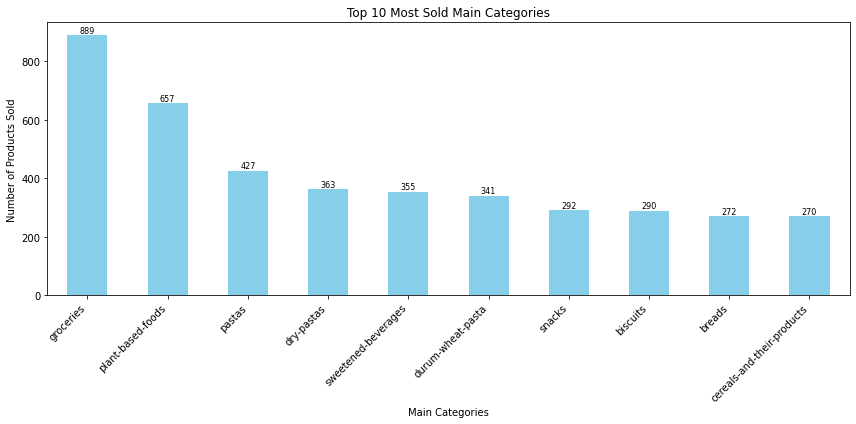

In [59]:
plt.figure(figsize=(12, 6))
ax = unique_main_categories.plot(kind='bar', color='skyblue')

# Displaying the actual count on top of each bar
for i, v in enumerate(unique_main_categories):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.title('Top 10 Most Sold Main Categories')
plt.xlabel('Main Categories')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
filtered_df.shape

(31193, 207)

In [63]:
filtered_df['additives_n'] = pd.to_numeric(filtered_df['additives_n'], errors='coerce')

C:\Users\Krishna Narwade\AppData\Local\Temp\ipykernel_5864\1929653245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['additives_n'] = pd.to_numeric(filtered_df['additives_n'], errors='coerce')


In [100]:
filtered_df[filtered_df['additives_n']>5]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,main_category2
21861,11182003987,http://world-en.openfoodfacts.org/product/0011...,openfoodfactsmx4,1539792222,2018-10-17T16:03:42Z,1644512349,2022-02-10T16:59:09Z,packbot,1.644512e+09,2022-02-10T16:59:09Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,refrigerated-foods
39790,16000159105,http://world-en.openfoodfacts.org/product/0016...,tacite,1457950015,2016-03-14T10:06:55Z,1659741488,2022-08-05T23:18:08Z,roboto-app,1.707493e+09,2024-02-09T15:40:11Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caramelo-suave
40294,16000189102,http://world-en.openfoodfacts.org/product/0016...,kiliweb,1539433095,2018-10-13T12:18:15Z,1702967891,2023-12-19T06:38:11Z,foodless,1.705516e+09,2024-01-17T18:26:05Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paquete-variado-de-dulce-en-rollo
40355,16000194304,http://world-en.openfoodfacts.org/product/0016...,openfoodfactsmx3,1541018430,2018-10-31T20:40:30Z,1702967950,2023-12-19T06:39:10Z,foodless,1.705516e+09,2024-01-17T18:26:14Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caramelo-sabor-a-frutas
40841,16000440296,http://world-en.openfoodfacts.org/product/0016...,openfoodfactsmx3,1541306675,2018-11-04T04:44:35Z,1644512545,2022-02-10T17:02:25Z,packbot,1.705610e+09,2024-01-18T20:31:14Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barra-de-granola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985271,8901972062947,http://world-en.openfoodfacts.org/product/8901...,halal-app-chakib,1605416257,2020-11-15T04:57:37Z,1644582604,2022-02-11T12:30:04Z,packbot,1.705627e+09,2024-01-19T01:10:33Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463-2
2987863,8906000610909,http://world-en.openfoodfacts.org/product/8906...,huzaifa,1521713665,2018-03-22T10:14:25Z,1672216801,2022-12-28T08:40:01Z,mudskipper875,1.672217e+09,2022-12-28T08:40:01Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vegetarian-nuggets
3021771,9120082270212,http://world-en.openfoodfacts.org/product/9120...,kiliweb,1561822208,2019-06-29T15:30:08Z,1693290610,2023-08-29T06:30:10Z,roboto-app,1.693291e+09,2023-08-29T06:30:10Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,meal-replacements
3025682,9300601930203,http://world-en.openfoodfacts.org/product/9300...,foodorigins,1440669612,2015-08-27T10:00:12Z,1644578460,2022-02-11T11:21:00Z,packbot,1.644578e+09,2022-02-11T11:21:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frozen-donuts


In [106]:
filtered_df[filtered_df['trans-fat_100g']>=0.1]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,main_category2
118534,37466064321,http://world-en.openfoodfacts.org/product/0037...,kiliweb,1610556354,2021-01-13T16:45:54Z,1680467152,2023-04-02T20:25:52Z,binzyboi,1.705628e+09,2024-01-19T01:28:06Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,milk-chocolate-bar
205451,50255022005,http://world-en.openfoodfacts.org/product/0050...,org-database-usda,1587661696,2020-04-23T17:08:16Z,1673494038,2023-01-12T03:27:18Z,binzyboi,1.705622e+09,2024-01-18T23:55:46Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chocolate-candies
205453,50255025006,http://world-en.openfoodfacts.org/product/0050...,usda-ndb-import,1489065904,2017-03-09T13:25:04Z,1706893191,2024-02-02T16:59:51Z,naruyoko,1.707502e+09,2024-02-09T17:59:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,filled-dark-chocolates
208654,51000218865,http://world-en.openfoodfacts.org/product/0051...,inf,1634687520,2021-10-19T23:52:00Z,1694647703,2023-09-13T23:28:23Z,5m4u9,1.705635e+09,2024-01-19T03:23:37Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,soup-mixes
231375,58336253416,http://world-en.openfoodfacts.org/product/0058...,kiliweb,1584118192,2020-03-13T16:49:52Z,1694250480,2023-09-09T09:08:00Z,binzyboi,1.705620e+09,2024-01-18T23:18:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pizzas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402213,7804000002087,http://world-en.openfoodfacts.org/product/7804...,foodvisor,1618765851,2021-04-18T17:10:51Z,1692852351,2023-08-24T04:45:51Z,5m4u9,1.705517e+09,2024-01-17T18:40:20Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,milk-chocolates-with-sweeteners
2987263,8904150502396,http://world-en.openfoodfacts.org/product/8904...,openfoodfacts-contributors,1538887640,2018-10-07T04:47:20Z,1644578795,2022-02-11T11:26:35Z,packbot,1.644579e+09,2022-02-11T11:26:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cookie-cake
2994158,8941100420553,http://world-en.openfoodfacts.org/product/8941...,blizzzard,1687669453,2023-06-25T05:04:13Z,1687670844,2023-06-25T05:27:24Z,blizzzard,1.705649e+09,2024-01-19T07:21:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paratha
3032152,9310047213808,http://world-en.openfoodfacts.org/product/9310...,beniben,1517646732,2018-02-03T08:32:12Z,1644525328,2022-02-10T20:35:28Z,packbot,1.705608e+09,2024-01-18T20:05:41Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,margarines


In [115]:
filtered_df[filtered_df['sugars_100g']>=70]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,main_category2
75447,258738,http://world-en.openfoodfacts.org/product/0025...,sil,1544307215,2018-12-08T22:13:35Z,1644579004,2022-02-11T11:30:04Z,packbot,1.644579e+09,2022-02-11T11:30:04Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,candies
159280,41387083262,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489140635,2017-03-10T10:10:35Z,1644512179,2022-02-10T16:56:19Z,packbot,1.707499e+09,2024-02-09T17:18:13Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,polvo-para-bebidas
474654,2176236,http://world-en.openfoodfacts.org/product/0217...,openfoodfacts-contributors,1629029545,2021-08-15T12:12:25Z,1644584950,2022-02-11T13:09:10Z,packbot,1.705633e+09,2024-01-19T03:01:41Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sweeteners
629981,0722776020029,http://world-en.openfoodfacts.org/product/0722...,openfoodfactsmx4,1539618057,2018-10-15T15:40:57Z,1644512448,2022-02-10T17:00:48Z,packbot,1.705609e+09,2024-01-18T20:23:26Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tabletop-sweeteners
645056,7410929,http://world-en.openfoodfacts.org/product/0741...,openfoodfacts-contributors,1559888961,2019-06-07T06:29:21Z,1644551842,2022-02-11T03:57:22Z,packbot,1.705492e+09,2024-01-17T11:42:21Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,honeys-from-france
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057420,9400501001116,http://world-en.openfoodfacts.org/product/9400...,date-limite-app,1445316502,2015-10-20T04:48:22Z,1587670522,2020-04-23T19:35:22Z,org-database-usda,1.705608e+09,2024-01-18T20:06:20Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,honeys
3059222,9414887000700,http://world-en.openfoodfacts.org/product/9414...,kiliweb,1531040342,2018-07-08T08:59:02Z,1644538554,2022-02-11T00:15:54Z,packbot,1.705608e+09,2024-01-18T20:06:25Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flower-honeys
3060140,9415272101057,http://world-en.openfoodfacts.org/product/9415...,kiliweb,1521955624,2018-03-25T05:27:04Z,1644552139,2022-02-11T04:02:19Z,packbot,1.705608e+09,2024-01-18T20:06:27Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,granulated-sugars
3060145,9415272107059,http://world-en.openfoodfacts.org/product/9415...,kiliweb,1538678235,2018-10-04T18:37:15Z,1690510773,2023-07-28T02:19:33Z,foodless,1.705609e+09,2024-01-18T20:19:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,maple-sugars


In [128]:
import pandas as pd

# Split the ingredients_text column into individual ingredients
all_ingredients = filtered_df['ingredients_text'].str.split(', ')

# Flatten the list of lists into a single list of all ingredients
all_ingredients_flat = [ingredient for sublist in all_ingredients.dropna() for ingredient in sublist]

# Create a Pandas Series from the list of ingredients
ingredients_series = pd.Series(all_ingredients_flat)

# Count the occurrences of each ingredient
ingredient_counts = ingredients_series.value_counts()

# Display the most common ingredients
print("Top 5 Most Common Ingredients:")
print(ingredient_counts.head(5))


Top 5 Most Common Ingredients:
sel       4600
eau       2799
Zucker    2495
sucre     2119
Wasser    1603
dtype: int64


In [129]:
pip install plotly


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
filtered_df['generic_name']

860                                      Salsa de mostaza
1081       Mehrkomponeneten Protein in Haselnuß Geschmack
1126        Mehrkomponeneten Protein in Bananen Geschmack
1348                100% Soja Protein Haselnuss Geschmack
1355             Whey Protein aus Molke Vanille Geschmack
                                ...                      
3075084                 Rüchtetee mit Rhabarber-Geschmack
3075085                                               NaN
3075086                                        Kräutertee
3075954                                               NaN
3081998                                               NaN
Name: generic_name, Length: 31193, dtype: object

In [250]:
filtered_df['cities_tags'].unique()

array([nan, 'aime-savoie-france', 'chantonnay-vendee-france', ...,
       'verrieres-le-buisson-essonne-france',
       'evry-essonne-france,verrieres-le-buisson-essonne-france',
       'verrieres-le-buisson-essonne-france,verrieres-le-buisson-essonne-france'],
      dtype=object)

In [176]:
import pandas as pd

# Assuming result_df is your DataFrame
unique_countries = filtered_df['origins'].unique()

# Printing all unique countries
for country in unique_countries:
    print(country)


nan
Germany
Nigeria
Royaume-Uni
México
Estados Unidos
Estados Unidos de América
Deutschland
Estados Unidos,México
United States,California
Estados unidos
United States
Estado Unidos de América
Thaïlande
en:Thailand
coconut
Grande-Bretagne
Mexico
ar:Émirats arabes unis
boulder Colorado
Estado de México
Estado de Mexico
España,Ibiza
Belgium
packaged in USA,keep refrigerated,lot no,and best by: on packaging
en:República Dominicana
OH,USA
Denmark
Colombia
Tewksbury   Massachusetts
CIUDAD DE MÉXICO
Canada
Non français
Sud Africa
USA
(Québec) CND
Québec
inconnu
fécule de maïs
Delaware,USA
Tailandia
Estados Unidos de America
more than one country
Finlande
France
Argentina
Francia
Grande-Bretagne,Écosse
Atlantique Nord-Est,Atlantique Nord-Ouest
thailande
Thailande
États-Unis
South Korea
Corea del Sur
Londonderry
fr:Colin d'Alaska,fr:Merlu blanc
Deutschland,Niederlande
Océan Atlantique,Océan Atlantique Nord-Est,FAO N°27
Netherlands
Allemagne
mondo
Label
Sel de Guérande,44350 Guérande,Loire-Atla

Inde,Pakistan,France
Alemania
Sicile,Italie
Poulet UE
Petits pois,France
Equateur
fr:Bassin de l'Adour, France
Loire-Atlantique,Pays de la Loire,France,Guérande
European Union,fr:Agriculture UE/non UE,fr:Céréales
France,Europe,Union européenne,Amérique du Sud
France,Bœuf,Viande de boeuf origine France
Noirmoutier,France
Francia,fr:49300 Cholet,fr:Maine-et-Loire,fr:Pays de la Loire
Crêperie Jarnoux SA,22400 Lamballe,Côtes-d'Armor,Bretagne,France,Lait frais entier breton
West Central Pacific Ocean
Aqualande,40120 Sarbazan,Landes,Aquitaine,France,Truite arc-en-ciel (Oncorhynchus mykiss)
Brie,Marne,Seine-et-Marne,France
Porc français,Lait français,Porto portugais
Marmande,Provence,France,Agriculture France
Francia,fr:Pommes françaises
Sel de Guérande,44350 Guérande,Loire-Atlantique,Pays de la Loire,Tomates,France,Oignons,Carottes,Union Européenne,Les autres ingrédients proviennent de diverses origines,Agriculture UE/non UE
France et divers
Loire,Haute Loire,France
fr:Abricots de France
Fra

In [157]:
most_common_label = filtered_df['labels_tags'].value_counts().head(10)

print("Most Common Label Tag:", most_common_label)

Most Common Label Tag: en:no-gluten                                        911
en:green-dot                                        630
en:vegetarian,en:vegan                              418
en:made-in-italy                                    389
en:made-in-germany                                  379
en:green-dot,fr:eco-emballages                      346
en:no-preservatives                                 250
en:no-palm-oil                                      216
en:green-dot,en:made-in-france,fr:eco-emballages    162
en:organic,en:eu-organic                            159
Name: labels_tags, dtype: int64


In [193]:
no_preservatives_claim['additives_n'].value_counts()

0.0     717
1.0     257
2.0     125
3.0      83
4.0      70
5.0      39
6.0      18
7.0      10
10.0      2
9.0       1
13.0      1
8.0       1
Name: additives_n, dtype: int64

In [194]:
no_preservatives_claim['brands']

42113                                           Foco
61577                                          Bijou
63068                                        Tiparos
186379                                         Noyan
190224     Mae ploy,Theppadungporn Coconut Co.  Ltd.
                             ...                    
3067292                                         Ayam
3067401                                         Ayam
3067405                                         Ayam
3067406                                         Ayam
3067459                                         Ayam
Name: brands, Length: 1545, dtype: object

In [198]:
no_preservatives_claim['brands'][no_preservatives_claim['additives_n'] > 1].value_counts().head(10)

William Saurin                 17
Yoplait,Panier de Yoplait      15
Matatie                         6
Homann                          6
St Hubert,St Hubert Oméga 3     6
Casino                          6
Petitjean                       6
Materne                         5
Ker Cadélac                     5
Carrefour                       5
Name: brands, dtype: int64

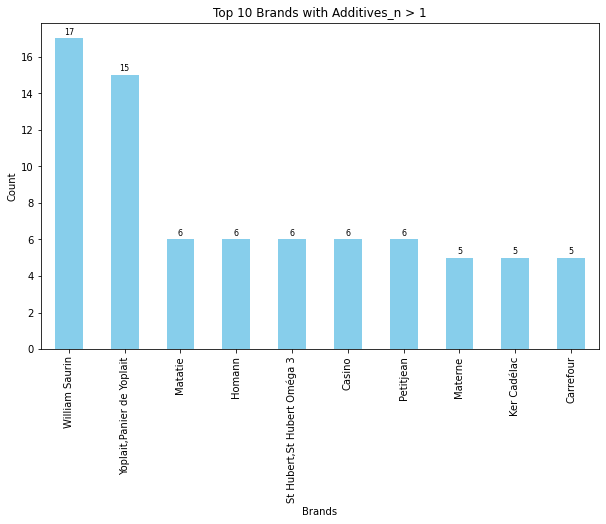

In [203]:
filtered_df_pres = no_preservatives_claim[no_preservatives_claim['additives_n'] > 1]

# Get the top 10 brands by value counts
top_brands = filtered_df_pres['brands'].value_counts().head(10)

# Plot the bar graph with counts on top
plt.figure(figsize=(10, 6))
bar_plot = top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands with Additives_n > 1')
plt.xlabel('Brands')
plt.ylabel('Count')

# Add counts on top of each bar
for index, value in enumerate(top_brands):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.show()

In [223]:
top_brands = filtered_df_pres[filtered_df_pres['brands']=='Yoplait,Panier de Yoplait']
top_brands

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,main_category2
1316062,3329770044586,http://world-en.openfoodfacts.org/product/3329...,hommedanslalune,1363809355,2013-03-20T19:55:55Z,1644559615,2022-02-11T06:06:55Z,packbot,1.644560e+09,2022-02-11T06:06:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316064,3329770044630,http://world-en.openfoodfacts.org/product/3329...,nash,1361479096,2013-02-21T20:38:16Z,1644559615,2022-02-11T06:06:55Z,packbot,1.644560e+09,2022-02-11T06:06:55Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316065,3329770044654,http://world-en.openfoodfacts.org/product/3329...,nash,1351778701,2012-11-01T14:05:01Z,1644559614,2022-02-11T06:06:54Z,packbot,1.644560e+09,2022-02-11T06:06:54Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316082,3329770047471,http://world-en.openfoodfacts.org/product/3329...,openfoodfacts-contributors,1401620192,2014-06-01T10:56:32Z,1644567180,2022-02-11T08:13:00Z,packbot,1.644567e+09,2022-02-11T08:13:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sweetened-yogurts
1316125,3329770049413,http://world-en.openfoodfacts.org/product/3329...,openfoodfacts-contributors,1460892196,2016-04-17T11:23:16Z,1644559137,2022-02-11T05:58:57Z,packbot,1.644559e+09,2022-02-11T05:58:57Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316126,3329770049420,http://world-en.openfoodfacts.org/product/3329...,date-limite-app,1432146640,2015-05-20T18:30:40Z,1644565966,2022-02-11T07:52:46Z,packbot,1.705600e+09,2024-01-18T17:48:43Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316127,3329770049437,http://world-en.openfoodfacts.org/product/3329...,date-limite-app,1424173667,2015-02-17T11:47:47Z,1644559617,2022-02-11T06:06:57Z,packbot,1.644560e+09,2022-02-11T06:06:57Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316128,3329770049444,http://world-en.openfoodfacts.org/product/3329...,tacite,1431370441,2015-05-11T18:54:01Z,1644559614,2022-02-11T06:06:54Z,packbot,1.644560e+09,2022-02-11T06:06:54Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strawberry-yogurts
1316129,3329770049451,http://world-en.openfoodfacts.org/product/3329...,tacite,1431370198,2015-05-11T18:49:58Z,1644559618,2022-02-11T06:06:58Z,packbot,1.644560e+09,2022-02-11T06:06:58Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits
1316132,3329770049499,http://world-en.openfoodfacts.org/product/3329...,openfoodfacts-contributors,1403638791,2014-06-24T19:39:51Z,1644559616,2022-02-11T06:06:56Z,packbot,1.644560e+09,2022-02-11T06:06:56Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaourts-multifruits


# Deceptive Labeling

In [248]:
top_brands[['product_name','packaging_tags','energy_100g','selenium_100g','cities_tags']]

,product_name,packaging_tags,energy_100g,selenium_100g,cities_tags
1316062,"Panier de Yoplait Cerise, Fraise, Framboise, Mûre","en:plastic,en:cardboard,en:fresh,fr:etui-carto...",407.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316064,"Panier de Yoplait Pêche, Poire","en:fresh,fr:etui-carton-a-recycler,fr:pot-plas...",416.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316065,"Panier de Yoplait Cerise, Fruits rouges","en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",393.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316082,Panier de Yoplait Quartiers (Pêche-Mangue),"en:fresh,fr:etui-carton-a-recycler,fr:pot-plas...",489.0,NaN,mans-sarthe-france
1316125,"Panier de Yoplait Exotique Mangue, Coco, Ananas","en:fresh,fr:8-pots,fr:etui-carton-a-recycler,f...",419.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316126,"Panier de Yoplait (2 Pêche, 2 Poire) 4 Pots","en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",415.0,NaN,mans-sarthe-france
1316127,Panier de Yoplait Abricot Nectarine,"en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",403.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316128,Panier de Yoplait Fraise,"en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",387.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316129,Panier de Yoplait Framboise Mûre,"en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",409.0,NaN,"mans-sarthe-france,vienne-isere-france"
1316132,"Panier de Yoplait (Cerise, Fraise, Framboise, ...","en:plastic,en:pot,en:cardboard,en:fresh,en:sea...",403.0,NaN,"mans-sarthe-france,vienne-isere-france"


In [276]:
condition = filtered_df['packaging'].str.contains('plastic', case=False, na=False)

# Apply the filter to the DataFrame
plastic_packaging_claim  = filtered_df[condition]

# Display the filtered DataFrame
plastic_packaging_claim.shape

(2260, 207)

In [277]:
plastic_packaging_claim['brands'].value_counts().head(10)

Bonafont            38
ICA                 37
Coop                35
Alpura              20
Barcel              20
Ritter Sport        18
Arla                15
Garofalo            14
Marabou,Mondelez    13
Milbona             13
Name: brands, dtype: int64

In [280]:
plastic_packaging_claim['stores'].value_counts().head(10)

Lidl                                                                           144
Coop                                                                           109
ICA Supermarket                                                                 96
REWE                                                                            44
Esselunga                                                                       38
Aldi                                                                            37
Walmart,Sams club                                                               26
Willys                                                                          25
Coop Konsum                                                                     24
Walmart,Bodega aurrera,Soriana,Mercado Soriana,La comer,Sams club,City Club     22
Name: stores, dtype: int64